In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set_theme(style="whitegrid", context='paper')

In [4]:
symps = pd.read_csv('result/bias_symptoms.csv', index_col=[0,1])

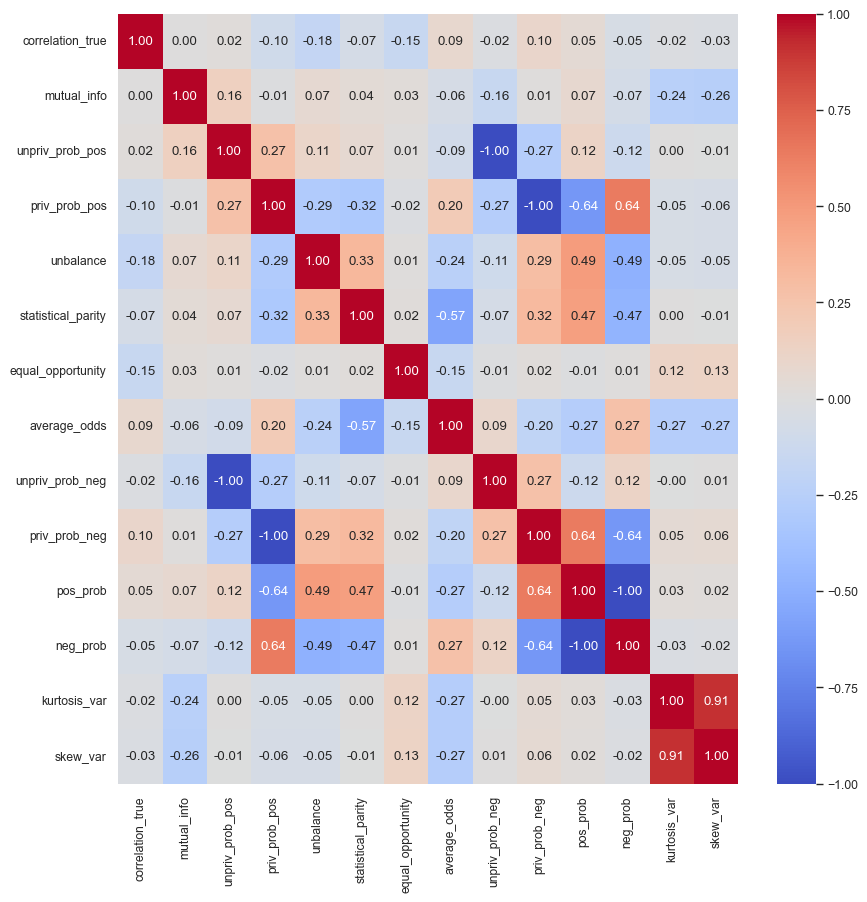

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(symps.corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [8]:
symps = pd.read_csv('result_class/bias_symptoms.csv', index_col=[0,1])

In [9]:
def plot_differences(symps, symp, symp_name):
    corr_high_sp = symps[symps["statistical_parity"] == 1][symp].values
    corr_low_sp = symps[symps["statistical_parity"] == 0][symp].values
    corr_high_eo = symps[symps["equal_opportunity"] == 1][symp].values
    corr_low_eo = symps[symps["equal_opportunity"] == 0][symp].values
    corr_high_ao = symps[symps["average_odds"] == 1][symp].values
    corr_low_ao = symps[symps["average_odds"] == 0][symp].values
    df = pd.DataFrame(
        {
            symp_name: [
                corr_high_sp,
                corr_low_sp,
                corr_high_eo,
                corr_low_eo,
                corr_high_ao,
                corr_low_ao,
            ],
            "Metric": [
                "Statistical Parity",
                "Statistical Parity",
                "Equal Opportunity",
                "Equal Opportunity",
                "Average Odds",
                "Average Odds",
            ],
            "Bias": ["High", "Low", "High", "Low", "High", "Low"],
        }
    )
    df = df.explode(symp_name)
    g = sns.FacetGrid(df, col="Metric", height=5, aspect=0.5)
    g.map(
        sns.barplot,
        "Bias",
        symp_name,
        "Bias",
        order=["Low", "High"],
        hue_order=["Low", "High"],
        palette=sns.color_palette()[:2],
    )
    g.add_legend()
    g.set_axis_labels("", "Mutual Information")
    plt.show()
    print(ttest_ind(corr_high_sp, corr_low_sp, equal_var=False))
    print(ttest_ind(corr_high_eo, corr_low_eo, equal_var=False))
    print(ttest_ind(corr_high_ao, corr_low_ao, equal_var=False))

## Analysis of Mutual Information

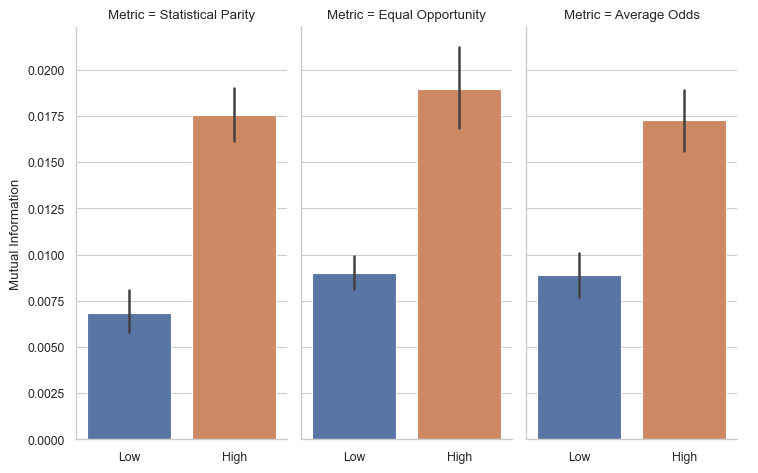

TtestResult(statistic=11.108663593646359, pvalue=2.7705158952738647e-28, df=4268.227811397881)
TtestResult(statistic=8.226538155139757, pvalue=3.4173127495717195e-16, df=2012.684628664952)
TtestResult(statistic=8.261758286180285, pvalue=2.0078764289817035e-16, df=3526.3362929889504)


In [10]:
plot_differences(symps, "mutual_info", "Mutual Information")

## Correlation

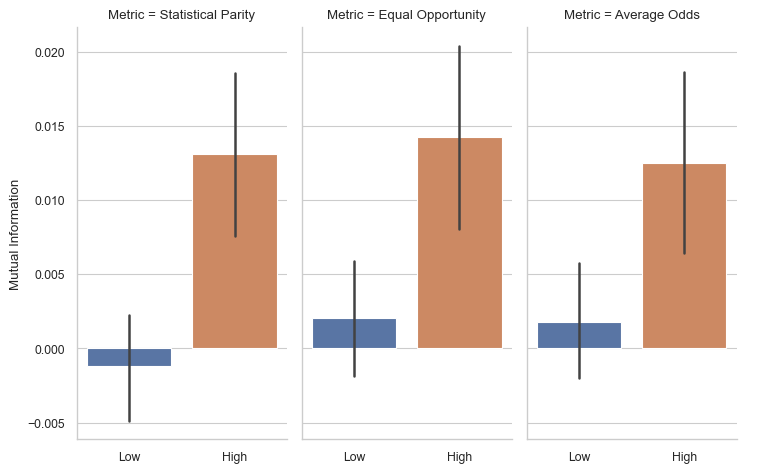

TtestResult(statistic=4.17427624309877, pvalue=3.054905979553435e-05, df=3881.4128094395132)
TtestResult(statistic=3.146462249962692, pvalue=0.0016709153486714314, df=2651.8017758651363)
TtestResult(statistic=2.9146784980409453, pvalue=0.003584845980012722, df=3254.4864052998996)


In [11]:
plot_differences(symps, "correlation_true", "Kendall's Tau")

## Metrics Distribution

In [12]:
distr = pd.DataFrame(
    [
        {
            "Statistical Parity": [
              symps[symps["statistical_parity"] == 0].shape[0]/symps.shape[0],
              symps[symps["statistical_parity"] == 1].shape[0]/symps.shape[0],
            ],
            "Equal Opportunity": [
              symps[symps["equal_opportunity"] == 0].shape[0]/symps.shape[0],
              symps[symps["equal_opportunity"] == 1].shape[0]/symps.shape[0],
            ],
            "Average Odds": [
              symps[symps["average_odds"] == 0].shape[0]/symps.shape[0],
              symps[symps["average_odds"] == 1].shape[0]/symps.shape[0],
            ],
            "Bias": ["Low", "High"]
        }
    ]
)

In [13]:
distr = distr.explode(['Statistical Parity', 'Equal Opportunity', 'Average Odds', 'Bias']).melt(id_vars='Bias', var_name='Metric', value_name='Proportion')

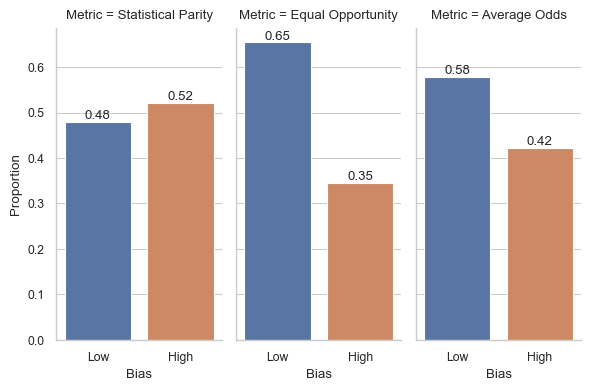

In [25]:
g = sns.catplot(
    data=distr,
    col="Metric",
    x="Bias",
    y="Proportion",
    kind="bar",
    hue="Bias",
    palette=sns.color_palette()[:2],
    height=4,
    aspect=0.5,
)


g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[0], fmt="%.2f")
g.facet_axis(0, 0).bar_label(g.facet_axis(0, 0).containers[1], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[0], fmt="%.2f")
g.facet_axis(0, 1).bar_label(g.facet_axis(0, 1).containers[1], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[0], fmt="%.2f")
g.facet_axis(0, 2).bar_label(g.facet_axis(0, 2).containers[1], fmt="%.2f")
plt.savefig('metrics_distr.pdf')
plt.show()